# Logistic Regression with Tensorflow

logistic regression equation. 

$$
ŷ =sigmoid(WX+b)
$$


*   WX = weight times features matrix multiplication operation,
*   WX+b =  weighted features add bias term,
*   sigmoid =  application of a sigmoid function.

sigmoid function
$$
\theta(y) = \frac{e^y}{1 + e^y} = exp(y) / (1 + exp(y)) = p
$$


In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
## load data

In [6]:
iris = load_iris()
iris.data[0:2] , iris .target[0:2]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2]]), array([0, 0]))

In [7]:
#train test split for validation 

In [8]:
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y= pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

In [9]:
#tensorflow constants 
trainX = tf.constant(trainX, dtype='float32')
trainY = tf.constant(trainY, dtype='float32')
testX = tf.constant(testX, dtype='float32')
testY = tf.constant(testY, dtype='float32')

In [13]:
#number of features and labels/classes for initializing W and b

In [15]:
numOfFeatures = trainX.shape[1]
numofClasses = trainY.shape[1]
[numOfFeatures,numofClasses]

[4, 3]

In [16]:
#Randomly sample from a normal distribution with standard deviation .01

W = tf.Variable(tf.random.normal([numOfFeatures,numofClasses],
                                       mean=0.,
                                       stddev=0.01,
                                       name="weights"),dtype='float32')


b = tf.Variable(tf.random.normal([1,numofClasses],
                                    mean=0.,
                                    stddev=0.01,
                                    name="bias"))
W,b

(<tf.Variable 'Variable:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 0.00225626,  0.02235163, -0.01794909],
        [-0.00414564, -0.01146309,  0.0003259 ],
        [-0.0124519 , -0.00802796, -0.00958993],
        [ 0.00209479,  0.00137991,  0.00794521]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[ 0.00920732,  0.01522497, -0.01884414]], dtype=float32)>)

In [19]:
#implement logistic regression ŷ =sigmoid(WX+b)
def logistic_regression(x):
    Wx = tf.matmul(x, W, name="apply_weights")#Wx
    Wxplusb = tf.add(Wx, b, name="add_bias") #Wx+b
    sigOfWxplusb = tf.nn.sigmoid(Wxplusb, name="activation") #sigmoid(Wx+b)
    return sigOfWxplusb

In [33]:
#cost function and optimizer(SGD)
loss_object = tf.keras.losses.MeanSquaredLogarithmicError()
learningRate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0008,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
optimizer = tf.keras.optimizers.SGD(learningRate)#0.000001 is learning rate

In [22]:
#calculate gradients for optimizing W and b 
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = loss_object(pred, y)
    gradients = g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [24]:
# training loop

In [34]:
display_step = 10
epoch_values = []
accuracy_values = []
loss_values = []
loss = 0
diff = 1

# Training epochs
numEpochs=1000
for i in range(numEpochs):
        # Run training step
        run_optimization(trainX, trainY)
        
        # Report occasional stats with test data
        if i % display_step == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            
            pred = logistic_regression(testX)

            newLoss = loss_object(pred, testY)
            # Add loss to live graphing variable
            loss_values.append(newLoss)
            
            # Generate accuracy stats on test data
            predclass = np.argmax(pred, axis=1)
            labelclass = np.argmax(testY, axis=1)
            acc = accuracy_score(predclass, labelclass)
            accuracy_values.append(acc)
            
    
            # Re-assign values for variables
            diff = abs(newLoss - loss)
            loss = newLoss

            #generate print statements
            print("step %d, training accuracy %g, loss %g, change in loss %g"%(i, acc, newLoss, diff))


step 0, training accuracy 0.3, loss 0.135444, change in loss 0.135444
step 10, training accuracy 0.3, loss 0.134876, change in loss 0.000568226
step 20, training accuracy 0.3, loss 0.134316, change in loss 0.000560224
step 30, training accuracy 0.3, loss 0.133764, change in loss 0.000552222
step 40, training accuracy 0.3, loss 0.133219, change in loss 0.00054422
step 50, training accuracy 0.3, loss 0.132683, change in loss 0.000536203
step 60, training accuracy 0.3, loss 0.132155, change in loss 0.000528231
step 70, training accuracy 0.3, loss 0.131635, change in loss 0.000520259
step 80, training accuracy 0.3, loss 0.131122, change in loss 0.000512302
step 90, training accuracy 0.3, loss 0.130618, change in loss 0.000504404
step 100, training accuracy 0.3, loss 0.130126, change in loss 0.00049156
step 110, training accuracy 0.3, loss 0.129662, change in loss 0.000464454
step 120, training accuracy 0.3, loss 0.129205, change in loss 0.000457421
step 130, training accuracy 0.3, loss 0.1

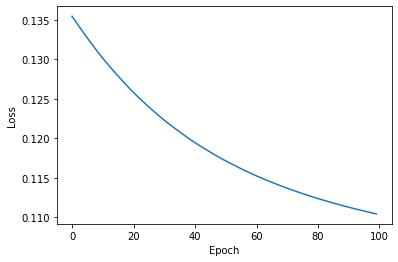

In [39]:
#loss progress on test data on test data 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values)
plt.show()

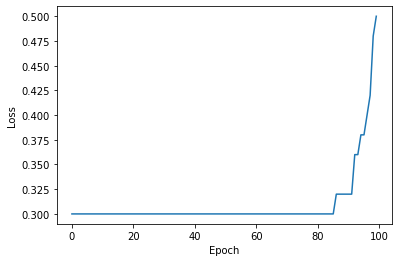

In [40]:
#accuracy progress on test data on test data 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(accuracy_values)
plt.show()